<a href="https://colab.research.google.com/github/norflin321/ml/blob/main/txt2img_diffusers_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

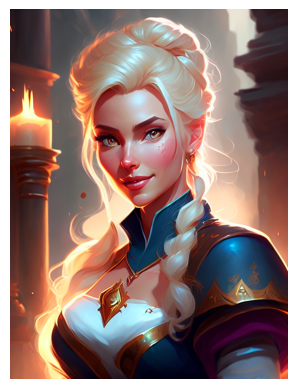

In [10]:
!pip install transformers diffusers accelerate

import torch
from diffusers import StableDiffusionPipeline
from matplotlib import pyplot as plt
import time

### hyperparameters (docs: https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/text2img#diffusers.StableDiffusionPipeline.__call__)
width = 576 # The width in pixels of the generated image
height = 768 # The height in pixels of the generated image
steps = 60 # The number of denoising steps. More denoising steps usually lead to a higher quality image at the expense of slower inference.
guidance = 7.5 # Higher guidance scale encourages to generate images that are closely linked to the text prompt, usually at the expense of lower image quality.
num_images_per_prompt = 1 # The number of images to generate per prompt

promp = "Elsa, d & d, fantasy, intricate, elegant, highly detailed, digital painting, artstation, concept art, matte, sharp focus, illustration, hearthstone, art by artgerm and greg rutkowski and alphonse mucha, 8k"
negative_prompt = "deformed, cripple, ugly, additional arms, additional legs, additional head, two heads, multiple people, group of people"
###

pipe = StableDiffusionPipeline.from_pretrained("dreamlike-art/dreamlike-diffusion-1.0", torch_dtype=torch.float16)
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
pipe = pipe.to(device)

image = pipe(prompt=promp, negative_prompt=negative_prompt, width=width, height=height, num_inference_steps=steps, guidance_scale=guidance).images[0]

image.save(f"./{int(time.time())}.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()